### nltk

In [115]:
import nltk
from nltk.corpus import stopwords
nltk.download('book', quiet=True)
from nltk.book import *
from nltk.tokenize import RegexpTokenizer, WordPunctTokenizer
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [116]:
#목록 확인
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

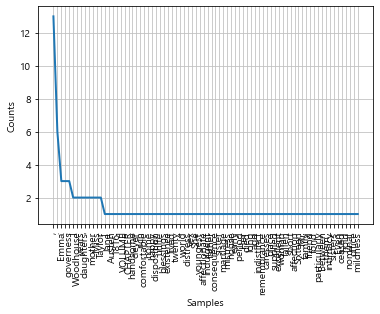

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [117]:
#데이터 생성
data = nltk.corpus.gutenberg.raw('austen-emma.txt')
#데이터 1000개까지
data = data[:1000]
#단어 단위 토크나이징
tokenizer = WordPunctTokenizer() #띄어쓰기 단위 토크나이징
data = tokenizer.tokenize(data)
#불용어 제거
data = [each_word for each_word in data if each_word not in stopwords.words()]
#단어 별 언급 빈도 확인
data_cnt = Counter(data)
data_cnt = dict(data_cnt)
#시각화(그래프)
data_graph = nltk.Text(data, name='word count')
data_graph.plot()

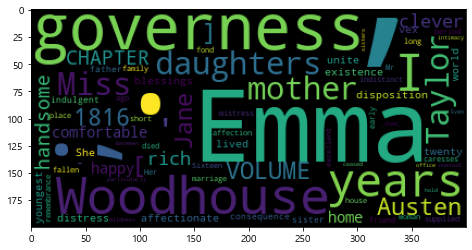

In [118]:
#워드 클라우드 그리기
wordcloud = WordCloud().generate_from_frequencies(data_cnt)
plt.figure(figsize=(8,4))
plt.imshow(wordcloud)
plt.axis('on')
plt.show()

#### 한국어 형태소 분석시

- Hannaum
- Kma
- Komoran
- Mecab
- Okt

In [119]:
from konlpy.tag import Okt

In [120]:
okt = Okt()
data = '오늘 날씨가 추워서 기분이 좋지 않다.'

#형태소 단위 분석
okt.morphs(data)

['오늘', '날씨', '가', '추워서', '기분', '이', '좋지', '않다', '.']

In [121]:
#명사 추출
okt.nouns(data)

['오늘', '날씨', '기분']

In [122]:
#어절 추출
okt.phrases(data)

['오늘', '오늘 날씨', '기분', '날씨']

In [123]:
#형태소 분석 - 품사 태깅
okt.pos(data)

[('오늘', 'Noun'),
 ('날씨', 'Noun'),
 ('가', 'Josa'),
 ('추워서', 'Adjective'),
 ('기분', 'Noun'),
 ('이', 'Josa'),
 ('좋지', 'Adjective'),
 ('않다', 'Verb'),
 ('.', 'Punctuation')]

In [124]:
from collections import Counter
import pandas as pd
import numpy as np

### 단어 빈도 계산

In [125]:
df = pd.read_csv('ratings.txt', delimiter='\t')
x = df['document'][:1000]
n = []
for i in x :
    n.append(i)

In [126]:
okt = Okt()
noun = okt.nouns(str(n))
count = Counter(noun)
noun_list = count.most_common(10)
for v in noun_list :
    print(v)

('영화', 326)
('정말', 89)
('최고', 79)
('연기', 62)
('진짜', 58)
('감동', 58)
('생각', 47)
('이', 47)
('그', 39)
('것', 37)


### 단어리스트 만들기

In [127]:
word_list = df['document'][:3000]
tag = []
for s in word_list :
    morph = okt.pos(s)
    tag.append(morph)

#명사 추출
noun_list = []
for s in tag :
    for word, tag in s :
        if tag in ['Noun'] :
            noun_list.append(word)

### 두글자 이상 단어만 추출

In [128]:
noun_list = [n for n in noun_list if len(n) > 1]
noun_list[:10]

['보고', '지금', '다시', '디자인', '학생', '외국', '디자이너', '일군', '전통', '통해']

### 단어별 개수 세기

In [129]:
counts = Counter(noun_list)
tags = counts.most_common(1000)
tags

[('영화', 985),
 ('정말', 265),
 ('최고', 230),
 ('진짜', 184),
 ('감동', 155),
 ('연기', 142),
 ('생각', 140),
 ('드라마', 121),
 ('보고', 119),
 ('사람', 110),
 ('평점', 103),
 ('다시', 94),
 ('마지막', 80),
 ('사랑', 78),
 ('스토리', 69),
 ('작품', 67),
 ('지금', 66),
 ('배우', 65),
 ('명작', 61),
 ('재미', 59),
 ('마음', 56),
 ('하나', 54),
 ('완전', 53),
 ('이영화', 52),
 ('추천', 50),
 ('장면', 49),
 ('매력', 49),
 ('느낌', 47),
 ('감독', 47),
 ('내용', 46),
 ('현실', 46),
 ('액션', 45),
 ('이야기', 43),
 ('그냥', 43),
 ('가슴', 43),
 ('주인공', 42),
 ('정도', 42),
 ('이해', 40),
 ('한번', 40),
 ('인생', 38),
 ('역시', 37),
 ('음악', 37),
 ('처음', 36),
 ('기억', 35),
 ('여운', 35),
 ('남자', 34),
 ('눈물', 34),
 ('우리', 34),
 ('인간', 33),
 ('시간', 33),
 ('대박', 32),
 ('한국', 32),
 ('결말', 30),
 ('가족', 30),
 ('모습', 29),
 ('연기력', 29),
 ('최고다', 27),
 ('대한', 26),
 ('영상', 26),
 ('보기', 26),
 ('아이', 26),
 ('가장', 26),
 ('소재', 25),
 ('모든', 25),
 ('연출', 25),
 ('여자', 25),
 ('시리즈', 24),
 ('모두', 24),
 ('개인', 24),
 ('부분', 24),
 ('반전', 23),
 ('때문', 23),
 ('계속', 23),
 ('무엇', 23),
 ('당시', 22),
 ('공감

In [130]:
dic = dict(count.most_common(1000))
dic

{'영화': 326,
 '정말': 89,
 '최고': 79,
 '연기': 62,
 '진짜': 58,
 '감동': 58,
 '생각': 47,
 '이': 47,
 '그': 39,
 '것': 37,
 '때': 35,
 '보고': 34,
 '수': 34,
 '드라마': 33,
 '다시': 32,
 '내': 32,
 '점': 32,
 '거': 31,
 '사람': 30,
 '지금': 27,
 '더': 27,
 '평점': 26,
 '명작': 26,
 '마음': 25,
 '마지막': 25,
 '사랑': 24,
 '재미': 24,
 '스토리': 24,
 '하나': 23,
 '말': 23,
 '볼': 23,
 '나': 22,
 '작품': 22,
 '완전': 21,
 '현실': 21,
 '왜': 20,
 '배우': 20,
 '듯': 19,
 '느낌': 19,
 '남자': 19,
 '추천': 19,
 '뭐': 18,
 '매력': 17,
 '굿': 16,
 '중': 16,
 '한번': 15,
 '장면': 15,
 '이야기': 15,
 '난': 15,
 '감독': 15,
 '한국': 15,
 '저': 14,
 '꼭': 14,
 '액션': 14,
 '이영화': 14,
 '편': 14,
 '주인공': 13,
 '좀': 13,
 '역시': 12,
 '속': 12,
 '또': 12,
 '정도': 12,
 '대박': 12,
 '연기력': 12,
 '처음': 11,
 '대한': 11,
 '기대': 11,
 '알': 11,
 '인생': 11,
 '모습': 11,
 '개인': 11,
 '가장': 11,
 '이해': 10,
 '인간': 10,
 '최고다': 10,
 '음악': 10,
 '자신': 10,
 '내용': 10,
 '모든': 10,
 '대해': 10,
 '도': 9,
 '제': 9,
 '전': 9,
 '만': 9,
 '기억': 9,
 '여운': 9,
 '봄': 9,
 '그냥': 9,
 '가족': 9,
 '요': 9,
 '때문': 9,
 '이건': 9,
 '짱': 9,
 '계속': 9,
 '무

### 워드클라우드 생성

(-0.5, 595.5, 638.5, -0.5)

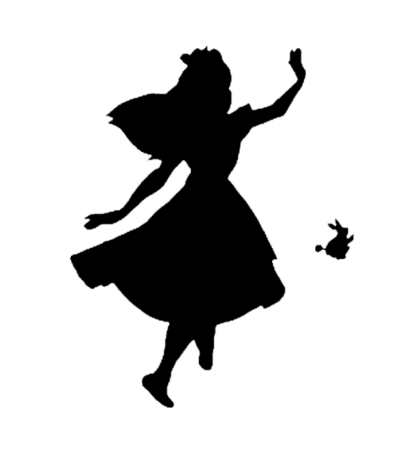

In [131]:
from PIL import Image #워드클라우드용 마스크를 생성하기위한 라이브러리
from wordcloud import WordCloud
import matplotlib.pyplot as plt

image_file = 'alice.png'
img_file = Image.open(image_file)
alice_mask = np.array(img_file)

plt.figure(figsize=(8,8))
plt.imshow(alice_mask)
plt.axis('off')

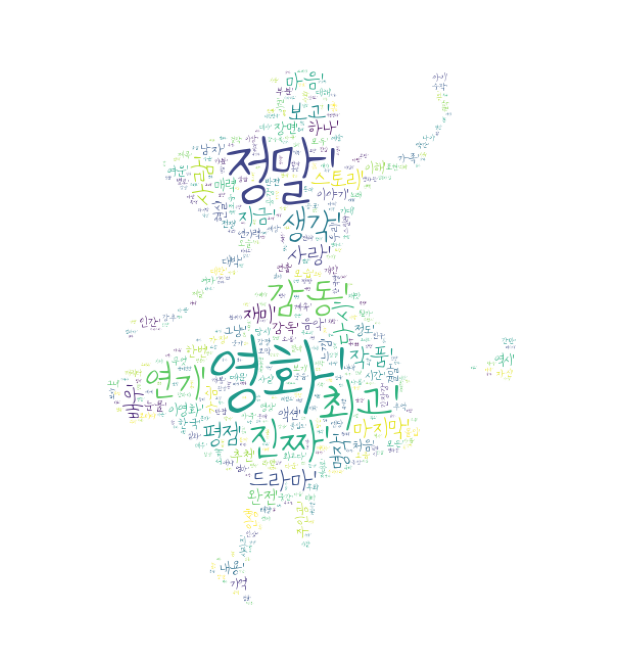

In [132]:
wordcloud = WordCloud(font_path='나눔손글씨 버드나무.ttf',
                      background_color='white',
                      max_words=1000,
                      mask=alice_mask)
wc = wordcloud.generate(str(tags))
plt.figure(figsize=(12,12))
plt.imshow(wc)
plt.axis('off')
plt.show()

### 네이버 평점 감성분류

#### 1. 목적
- 네이버 영화리뷰 데이터셋을 이용해서 긍정/부정 분류 모델을 만들어보자
- TF-IDF 적용해보기

#### 2.데이터수집
- 네이버 영화 리뷰 데이터 사용

In [133]:
import numpy as np
import pandas as pd

In [134]:
df = pd.read_csv('ratings.txt', delimiter='\t')
df.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


#### 3.데이터 전처리

In [135]:
#null값 삭제
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199992 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        199992 non-null  int64 
 1   document  199992 non-null  object
 2   label     199992 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.1+ MB


In [136]:
x = df['document']
y = df['label']

In [137]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=0)
#설정안해주면 trian 75, test 25 

In [138]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(149994,)
(149994,)
(49998,)
(49998,)


In [139]:
from konlpy.tag import Okt
okt = Okt()

In [140]:
#명사 토큰화
okt.nouns('오늘은 학교에 가는 날이에요.')

['오늘', '학교', '날']

In [141]:
def Tokenizer(text) :
    return okt.nouns(text)

In [142]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(tokenizer=Tokenizer)
#학습
tfidf.fit(x_train[:3])
#단어사전
tfidf.vocabulary_ 

c:\Users\82104\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


{'거': 3,
 '예전': 9,
 '감독': 2,
 '하나': 12,
 '사람': 6,
 '가지': 0,
 '갈피': 1,
 '캐릭터': 10,
 '마틴': 5,
 '프리': 11,
 '널': 4,
 '사랑': 7,
 '애기': 8}

#### pos tagging
- 문장을 토큰화 한 후 쪼개진 형태소에 품사를 부여하는 것

In [143]:
data = '오늘 날씨가 추워서 기분이 좋지않다.'
okt.morphs(data)

['오늘', '날씨', '가', '추워서', '기분', '이', '좋지', '않다', '.']

In [144]:
okt.pos(data)

[('오늘', 'Noun'),
 ('날씨', 'Noun'),
 ('가', 'Josa'),
 ('추워서', 'Adjective'),
 ('기분', 'Noun'),
 ('이', 'Josa'),
 ('좋지', 'Adjective'),
 ('않다', 'Verb'),
 ('.', 'Punctuation')]

In [145]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [146]:
def Tokenizer1(text):
    df = pd.DataFrame(okt.pos(text), columns=['morph', 'tag'])
    df.set_index('tag', inplace=True)
    
    #동사, 명사, 형용사일 때만 그 값을 반환
    if('Verb' in df.index) | ('Adjective' in df.index) | ('Noun' in df.index) :
        labels = ['Verb', 'Adjective', 'Noun']
        return df.loc[df.index.intersection(labels)]['morph'].values
    else :
        return []

In [147]:
Tokenizer1(data)

array(['오늘', '날씨', '기분', '추워서', '좋지', '않다'], dtype=object)

In [148]:
tfidf = TfidfVectorizer(tokenizer=Tokenizer1)
tfidf.fit(x_train[:3])
tfidf.vocabulary_ #단어사전

c:\Users\82104\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


{'거': 3,
 '예전': 15,
 '감독': 2,
 '하나': 19,
 '사람': 11,
 '가지': 0,
 '봤는데': 10,
 '하고': 18,
 '싶은말은': 13,
 '놀리지마라': 6,
 '갈피': 1,
 '캐릭터': 16,
 '못잡고': 9,
 '헤매는': 21,
 '마틴': 7,
 '프리': 17,
 '널': 5,
 '사랑': 12,
 '애기': 14,
 '먼': 8,
 '귀여워': 4,
 '해': 20}

In [149]:
x_train = x_train[:5000]
x_test = x_test[:5000]
y_train = y_train[:5000]
y_test = y_test[:5000]

tfidf1 = TfidfVectorizer(tokenizer=Tokenizer1)
tfidf1.fit(x_train)

c:\Users\82104\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(tokenizer=<function Tokenizer1 at 0x000002CA2CC41AF0>)

In [150]:
len(tfidf1.vocabulary_) #단어사전의 개수

12750

In [151]:
#토큰화된 단어를 기계가 이해할 수 있도록 백터형태로 변환
x_train = tfidf1.transform(x_train)
x_test = tfidf1.transform(x_test)

#### 4.EDA

#### 5-7.모델링(모델선택, 모델학습, 모델평가)

In [152]:
from sklearn.linear_model import LogisticRegression

In [153]:
lr = LogisticRegression()
#모델학습
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.771

### Okt

In [154]:
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['image.cmap'] = 'gray'
# 경고창 피하는 코드
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)
import numpy as np
import pandas as pd
import re
from konlpy.tag import Okt
from tqdm import tqdm

In [155]:
data = pd.read_table('ratings.txt')
data['document'].nunique()

194543

In [156]:
#중복 제거
data.drop_duplicates(subset=['document'], inplace=True)

In [157]:
len(data)

194544

<AxesSubplot:>

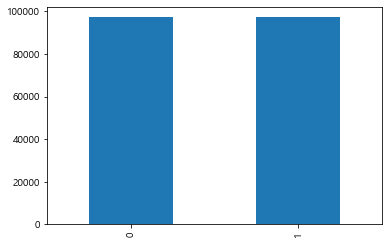

In [158]:
data['label'].value_counts().plot(kind='bar')

In [159]:
data.groupby('label').size().reset_index(name='count')

,label,count
0,0,97277
1,1,97267


In [160]:
#null값이 있다는 뜻
data.isnull().values.any()

True

In [161]:
data.isnull().sum()

id          0
document    1
label       0
dtype: int64

In [162]:
#null값 확인
data.loc[data.document.isnull()]

,id,document,label
46471,6369843,NaN,1


In [163]:
data.dropna(inplace=True) #삭제
data.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [164]:
len(data)

194543

In [168]:
#데이터를 하나만 갖고오면 시리즈형태이기에 replace가 먹히지 않음
data['document'] = data['document'].str.replace("[^ㄱ-하-ㅣ가-힣]"," ")
data

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1
...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ,0
199996,3302770,쓰 레 기,0
199997,5458175,완전 사이코영화 마지막은 더욱더 이 영화의질을 떨어트린다,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0


In [169]:
data.isnull().values.any()

False

In [170]:
data['document'].replace('',np.nan, inplace=True)
data.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [172]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.document, data.label,
                                                    random_state=1234)

In [173]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로',
             '자','에','와','한','하다']

In [174]:
okt = Okt()
#어간 추출
okt.morphs('오늘 날씨가 추워서 기분이 좋지않다.', stem=True)

['오늘', '날씨', '가', '춥다', '기분', '이', '좋다', '않다', '.']

In [175]:
x_train = x_train[:10000]
x_test = x_test[:10000]
y_train = y_train[:10000]
y_test = y_test[:10000]

In [178]:
train_x = []

for s in tqdm(x_train) :
    temp_x = []
    temp_x = okt.morphs(s, stem=True)
    temp_x = [word for word in temp_x if not word in stopwords]
    train_x.append(temp_x)
    
test_x = []

for s in tqdm(x_test) :
    temp_x = []
    temp_x = okt.morphs(s, stem=True)
    temp_x = [word for word in temp_x if not word in stopwords]
    test_x.append(temp_x)

100%|██████████| 10000/10000 [00:21<00:00, 455.89it/s]


In [179]:
train_x[:3]

[['영화', '자체', '재앙', '이다', 'ㅠㅠ'],
 ['정준영', '일박이일', '살리다', 'ㅋ'],
 ['양키',
  '놈',
  '도대체',
  '왜',
  '살인마',
  '열광하다',
  '이건',
  '뭐',
  '재미',
  '없다',
  '긴장도',
  '안되다',
  '졸라',
  '뻔하다',
  '숨',
  '만',
  '나오다']]

In [180]:
test_x[:3]

[['내', '가보다', '영화', '중', '에서', '젤', '최악', '이다', '게', '영화'],
 ['굿', '개잼', '꿀잼', '핵잼', '무한', '추천'],
 ['인류', '멸망', '이라', '쓰다', '일', '본', '감염', '이라', '읽다', 'ㅁㅊ']]

### Word2Vec2

In [181]:
from gensim.models import Word2Vec

In [191]:
# size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
# window = 컨텍스트 윈도우 크기
# min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
# workers = 학습을 위한 프로세스 수
# sg = 0은 CBOW, 1은 Skip-gram.

In [193]:
w2v = Word2Vec(train_x, vector_size=300, window=3, min_count=3)
word_vectors = w2v.wv
vocabs = word_vectors.key_to_index

In [194]:
word_vectors_list = [word_vectors[v] for v in vocabs]
print(word_vectors_list[:1])

[array([ 1.52579136e-02,  3.69203806e-01,  5.71376085e-02,  9.76167470e-02,
       -2.84695309e-02, -3.11549038e-01,  2.05039337e-01,  6.84749782e-01,
        5.76879084e-02, -1.23442203e-01,  2.81827030e-04, -2.83991367e-01,
       -1.42776559e-03,  5.81537262e-02, -2.83777446e-01, -2.24820897e-01,
        1.00925997e-01, -8.43604133e-02,  6.71591088e-02, -1.53478667e-01,
       -1.85602471e-01,  2.72455215e-02,  3.12722325e-01,  8.60885680e-02,
        2.68774599e-01, -6.51654080e-02, -3.56956571e-01, -6.81670159e-02,
       -1.57702088e-01, -3.32600415e-01, -3.02704293e-02, -1.56861216e-01,
       -2.79561616e-02, -1.83310285e-02,  3.62630971e-02,  1.66930586e-01,
        5.19180372e-02, -3.56658041e-01,  3.23954970e-02, -6.05178513e-02,
       -2.04388112e-01,  2.30138060e-02,  3.87342945e-02, -2.56421983e-01,
        1.09903410e-01,  3.00570756e-01,  1.41966596e-01,  1.29625678e-01,
       -8.97901356e-02,  3.34305197e-01, -2.16499232e-02, -8.85178428e-03,
       -1.61174193e-01, 

In [196]:
#유사한 단어 뽑아봄
w2v.wv.most_similar('관객')

[('라', 0.9997954368591309),
 ('살다', 0.9997900128364563),
 ('받다', 0.9997888207435608),
 ('속', 0.9997847080230713),
 ('우리', 0.9997836947441101),
 ('라는', 0.9997832775115967),
 ('대한', 0.9997795224189758),
 ('저', 0.9997790455818176),
 ('그리고', 0.9997789859771729),
 ('하지만', 0.9997788667678833)]

In [197]:
#학습된 모델 저장
w2v.save('w2v.bin')

In [198]:
#저장된 모델 불러오기
saved_w2v = Word2Vec.load('w2v.bin')
print(saved_w2v)

Word2Vec(vocab=4229, vector_size=300, alpha=0.025)
